In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import warnings

warnings.filterwarnings('ignore')

df_total = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/COVID-Alura/main/cases-brazil-states.csv")
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [24]:
df = df_total[df_total['estado'] != 'TOTAL']
df['data'] = pd.to_datetime(df_total['data']).dt.date

In [25]:
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Óbitos')

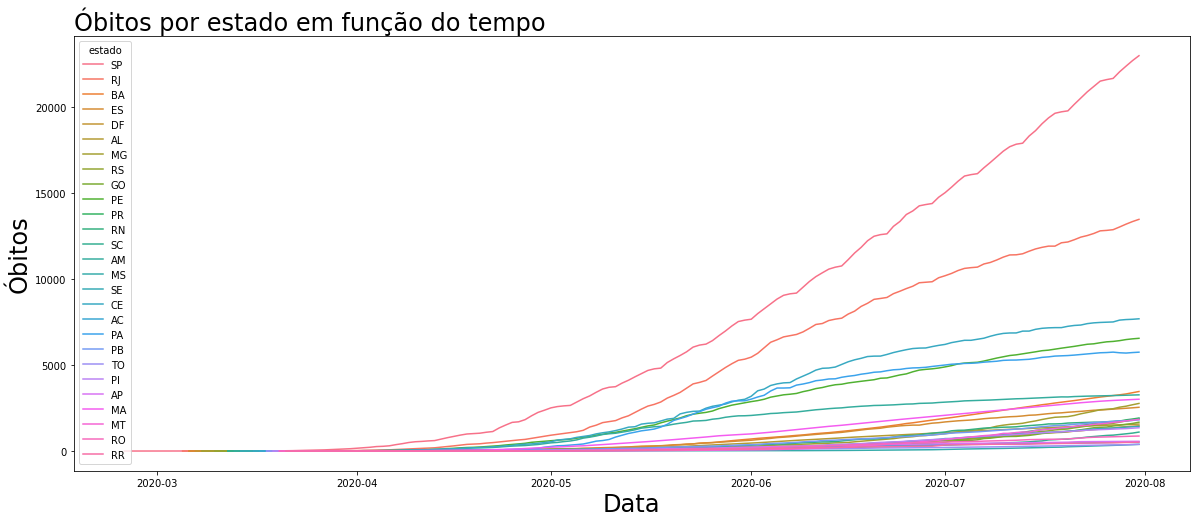

In [26]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data',y='Obitos',hue='estado',data=df)
fig.set_title('Óbitos por estado em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos', fontsize=24)

In [29]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


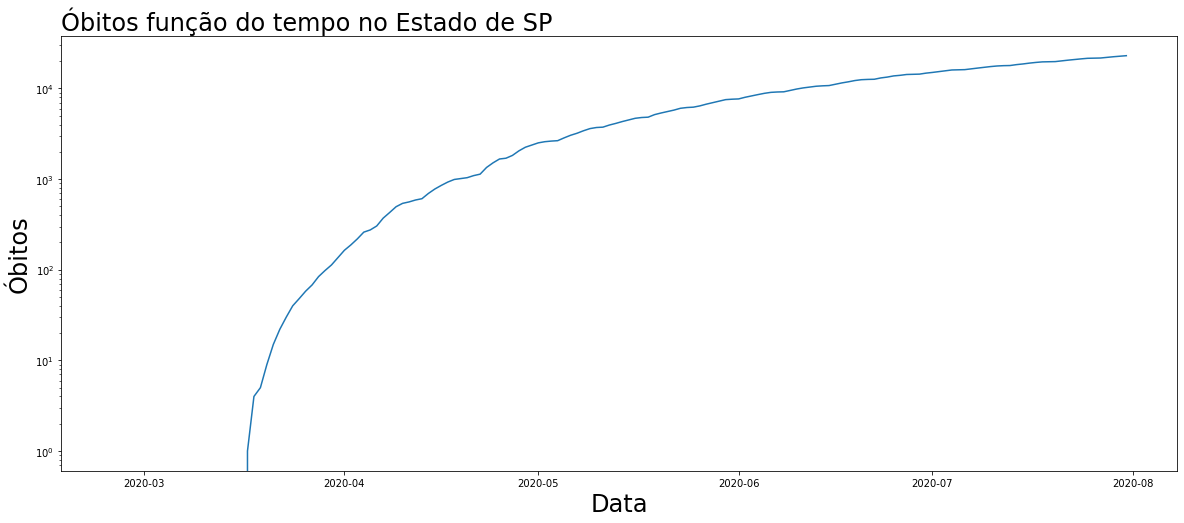

In [35]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data',y='Obitos',data=df_sp)
fig.set_title('Óbitos função do tempo no Estado de SP', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos', fontsize=24)
fig.set_yscale('log')
plt.show()

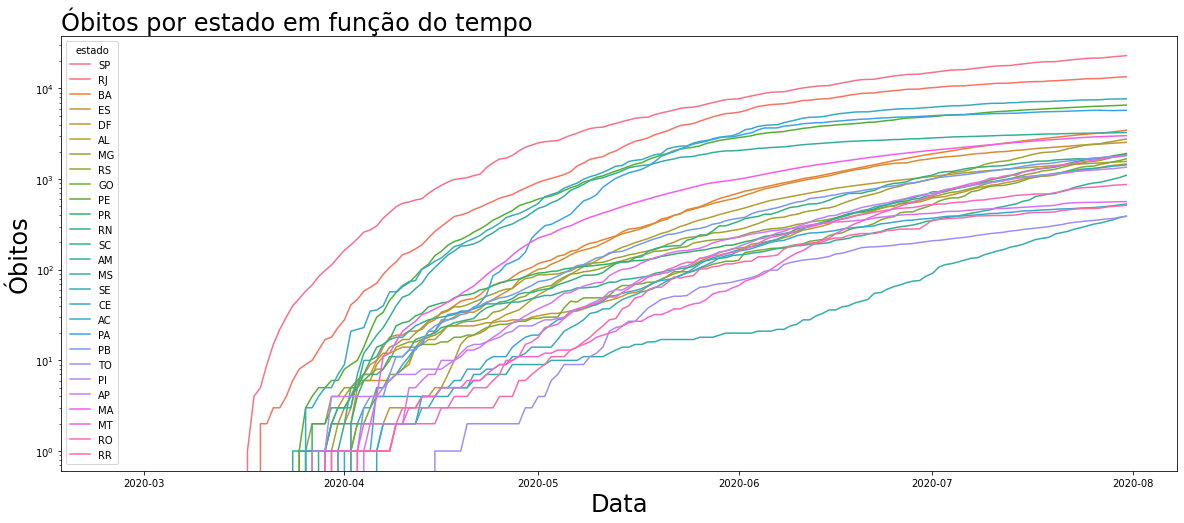

In [36]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data',y='Obitos',data=df, hue='estado')
fig.set_title('Óbitos por estado em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos', fontsize=24)
fig.set_yscale('log')
plt.show()

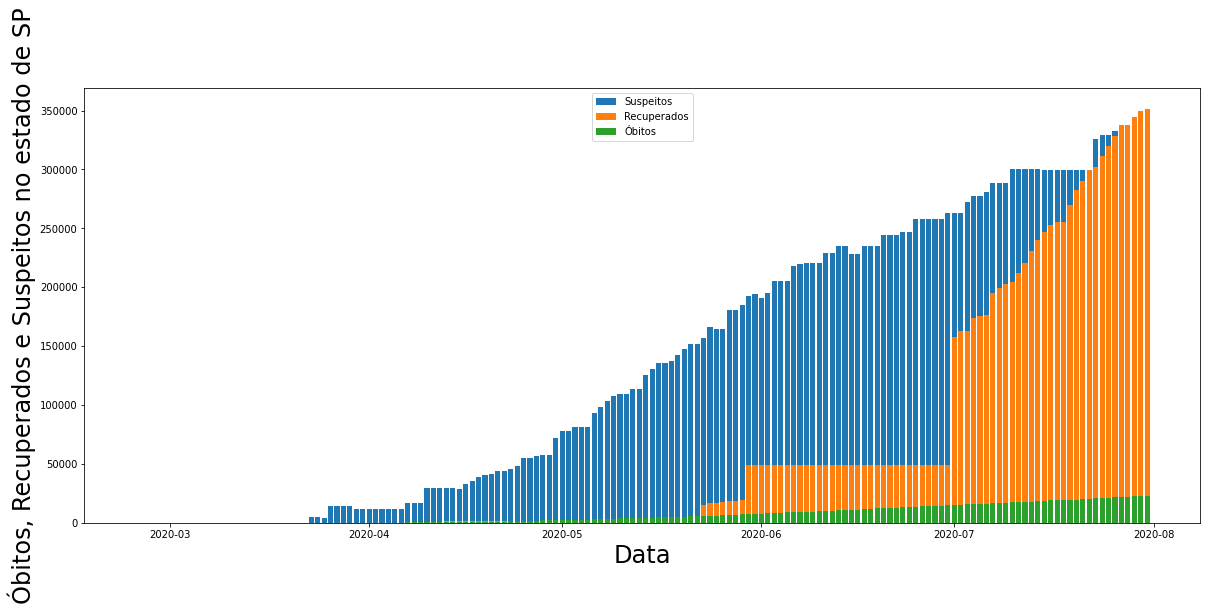

In [43]:
plt.figure(figsize=(20,8))
fig = plt.bar(df_sp.data,df_sp.suspeitos,label='Suspeitos', data=df_sp)
plt.bar(df_sp.data,df_sp.recuperados,label='Recuperados', data=df_sp)
plt.bar(df_sp.data,df_sp.Obitos,label='Óbitos', data=df_sp)
plt.xlabel('Data', fontsize=24)
plt.ylabel('Óbitos, Recuperados e Suspeitos no estado de SP' ,fontsize=24,rotation=90)
plt.legend()
plt.show()

In [68]:
def plotar_linha(titulo,xlabel,ylabel,x,y,dataset,hue):
    ax = sns.lineplot(x=x,y=y,hue=hue,data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo,loc='left',fontsize=20)
    ax.set_ylabel(ylabel,fontsize=20)
    ax.set_xlabel(xlabel,fontsize=20)


In [69]:
def plotar_barra(titulo,xlabel,ylabel,x,y,dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x],dataset[y])
    plt.title(titulo,loc='left',fontsize=20)
    plt.ylabel(ylabel,fontsize=20)
    plt.xlabel(xlabel,fontsize=20)


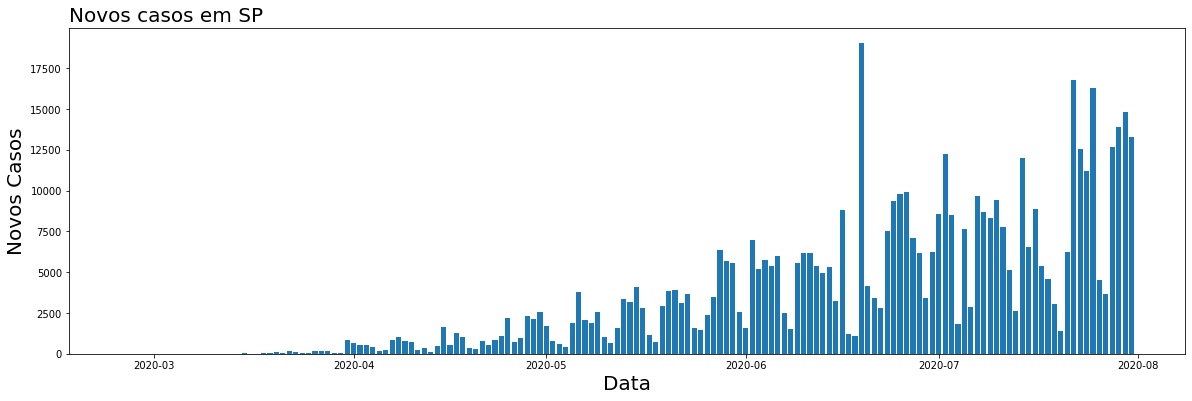

In [47]:
plotar_barra('Novos casos em SP', 'Data','Novos Casos', 'data', 'novosCasos', df_sp)

In [49]:
df_sp['aceleracaoCasos'] = df_sp['novosCasos'].diff()
df_sp['aceleracaoObitos'] = df_sp['Obitos'].diff()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0
14,10,2020-03-03,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0
16,10,2020-03-04,Brazil,SP,TOTAL,0,0,1,3,0,3,0.0,0.00653,0.0,NaN,NaN,NaN,NaN,1.0,0.0
19,10,2020-03-05,Brazil,SP,TOTAL,0,0,3,6,0,6,0.0,0.01307,0.0,NaN,NaN,NaN,NaN,2.0,0.0


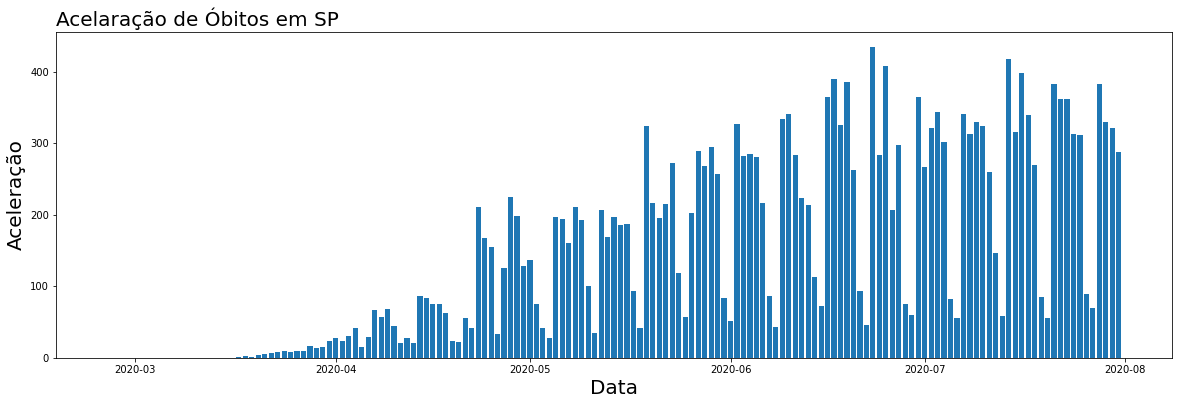

In [51]:
plotar_barra('Acelaração de Óbitos em SP', 'Data', 'Aceleração', 'data','aceleracaoObitos', df_sp)

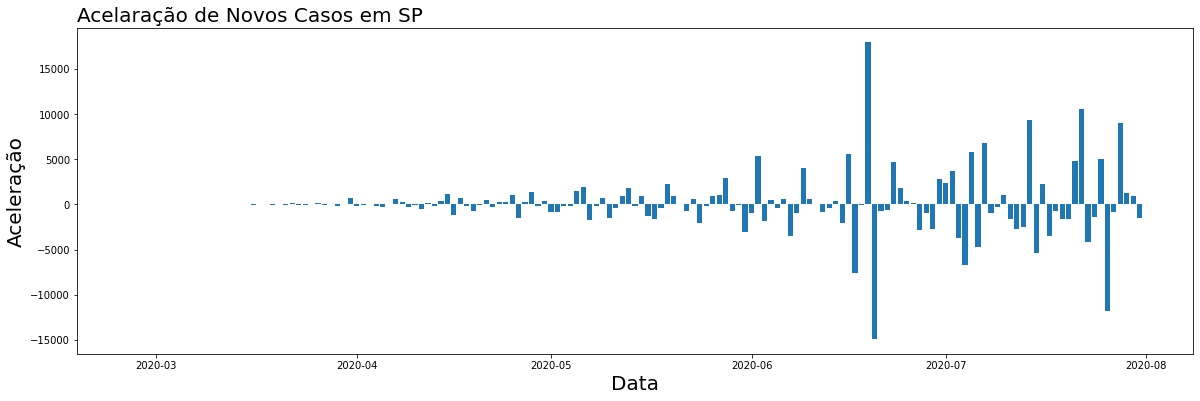

In [56]:
plotar_barra('Acelaração de Novos Casos em SP', 'Data', 'Aceleração', 'data','aceleracaoCasos', df_sp)

In [53]:
df_sp['aceleracaoRecuperados'] = df_sp['recuperados'].diff()

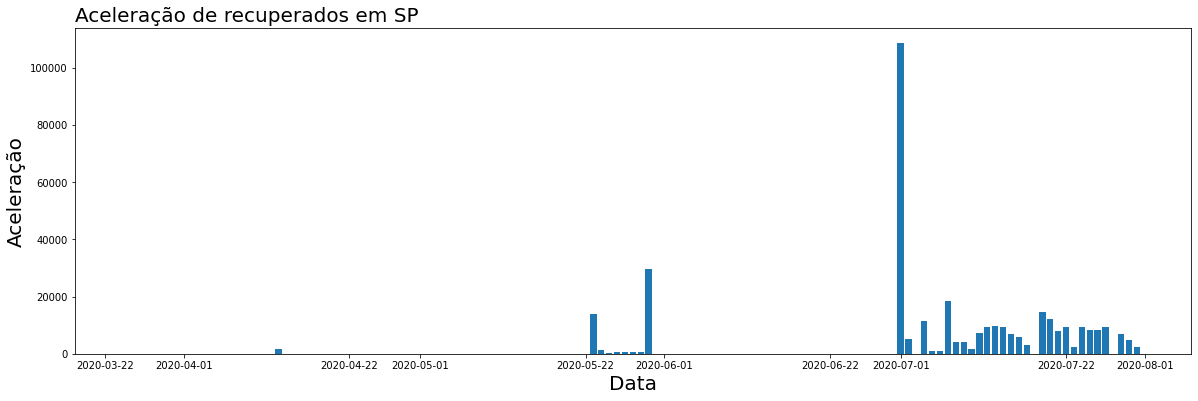

In [54]:
plotar_barra('Aceleração de recuperados em SP','Data','Aceleração','data','aceleracaoRecuperados',df_sp)

In [57]:
df_sp['mediaObitos'] = df_sp.novosObitos.rolling(window=7,center=False).mean()
df_sp['mediaObitos_14'] = df_sp.novosObitos.rolling(window=14,center=False).mean()
df_sp.head(15)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados,mediaObitos,mediaObitos_14
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
14,10,2020-03-03,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
16,10,2020-03-04,Brazil,SP,TOTAL,0,0,1,3,0,3,0.0,0.00653,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,NaN
19,10,2020-03-05,Brazil,SP,TOTAL,0,0,3,6,0,6,0.0,0.01307,0.0,NaN,NaN,NaN,NaN,2.0,0.0,NaN,0.0,NaN


<BarContainer object of 158 artists>

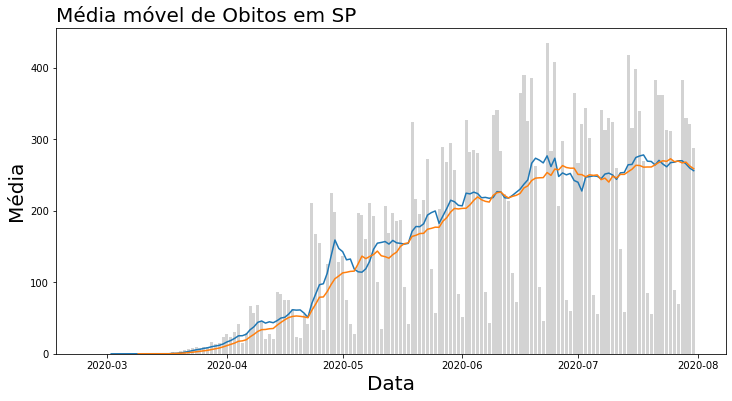

In [72]:
plotar_linha('Média móvel de óbitos em SP', 'Data', 'Média' , 'data', 'mediaObitos',df_sp, None)
plotar_linha('Média móvel de Obitos em SP', 'Data', 'Média', 'data', 'mediaObitos_14', df_sp, None)
plt.bar(df_sp['data'],df_sp['novosObitos'], color='lightgrey')

In [75]:
from pandas.plotting import autocorrelation_plot

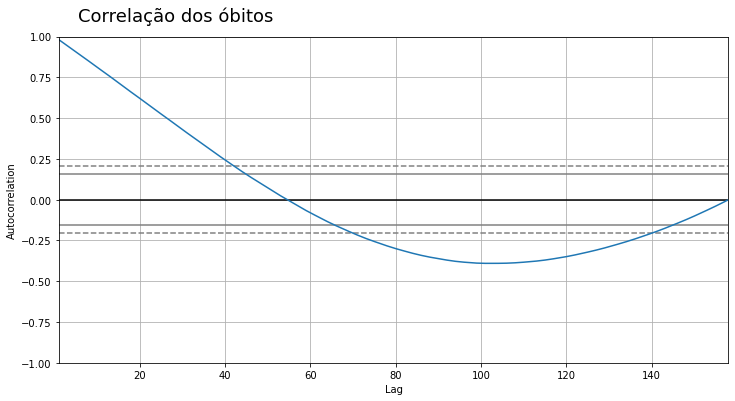

In [76]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos óbitos', fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['Obitos'])

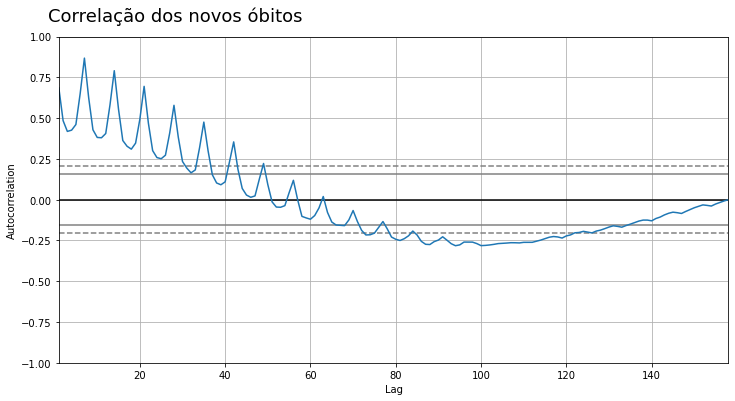

In [80]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos novos óbitos', fontsize=18,x=0.26, y=0.95)
autocorrelation_plot(df_sp['novosObitos'])

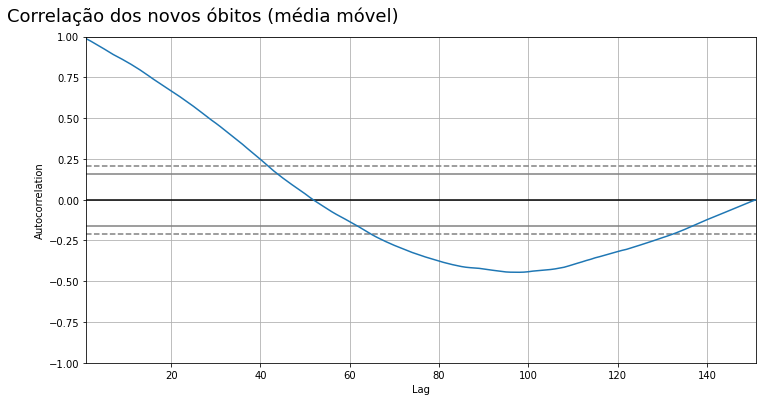

In [81]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos novos óbitos (média móvel)', fontsize=18,x=0.26, y=0.95)
autocorrelation_plot(df_sp['mediaObitos'][7:])

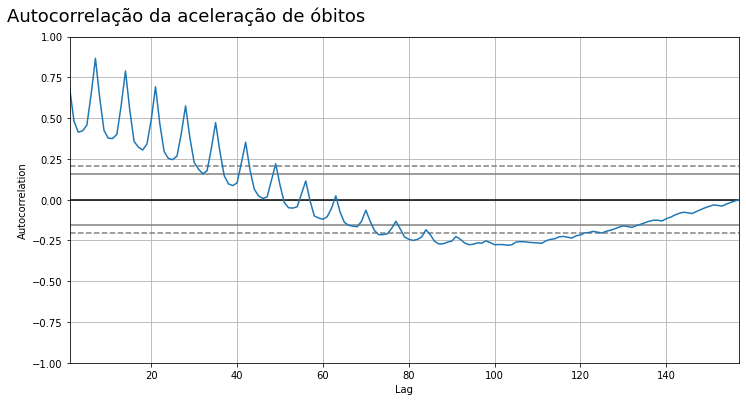

In [82]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação da aceleração de óbitos', fontsize=18,x=0.26, y=0.95)
autocorrelation_plot(df_sp['aceleracaoObitos'][1:])

In [89]:
df_sp['mês'] = pd.to_datetime(df_sp['data'])
df_sp['dia_da_semana'] = df_sp['mês'].dt.day_name()


In [90]:
dias_traduzidos = {'Monday' : 'Segunda' , 'Tuesday' : 'Terça' , 'Wednesday' : 'Quarta' , 'Thursday' : 'Quinta' , 'Friday' : 'Sexta' , 'Saturday' : 'Sábado' , 'Sunday' : 'Domingo'}

In [91]:
df_sp['dia_da_semana'] = df_sp['dia_da_semana'].map(dias_traduzidos)

In [93]:
agrupados_sp = df_sp.groupby('dia_da_semana')['Obitos', 'novosObitos', 'aceleracaoObitos'].mean().round()

In [100]:
agrupados_sp['dia_da_semana'] = agrupados_sp.index

In [101]:
agrupados_sp.head()

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,6846.0,60.0,60.0,Domingo
Segunda,6887.0,41.0,41.0,Segunda
Terça,6794.0,206.0,216.0,Terça
Quarta,6975.0,181.0,181.0,Quarta
Quinta,7165.0,190.0,190.0,Quinta


In [102]:
agrupados_sp = agrupados_sp.reindex(['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'])
agrupados_sp.head()

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,6846.0,60.0,60.0,Domingo
Segunda,6887.0,41.0,41.0,Segunda
Terça,6794.0,206.0,216.0,Terça
Quarta,6975.0,181.0,181.0,Quarta
Quinta,7165.0,190.0,190.0,Quinta


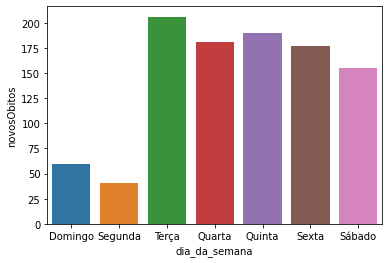

In [103]:
sns.barplot(agrupados_sp['dia_da_semana'], agrupados_sp.novosObitos)

In [113]:
def criar_features(df,label=None):
    df = df.copy()
    df['diasemana'] = df['mês'].dt.dayofweek
    df['mes'] = df['mês'].dt.month
    df['diames'] = df['mês'].dt.day

    X = df[['diasemana', 'mes', 'diames']]

    if label:
        y = df[label]
        return X,y
    return X


In [114]:
X, y = criar_features(df_sp, label='Obitos')

In [115]:
df_final = pd.concat([X,y], axis=1)

In [116]:
df_final.head(10)

,diasemana,mes,diames,Obitos
0,1,2,25,0
2,2,2,26,0
4,3,2,27,0
6,4,2,28,0
8,5,2,29,0
10,6,3,1,0
12,0,3,2,0
14,1,3,3,0
16,2,3,4,0
19,3,3,5,0


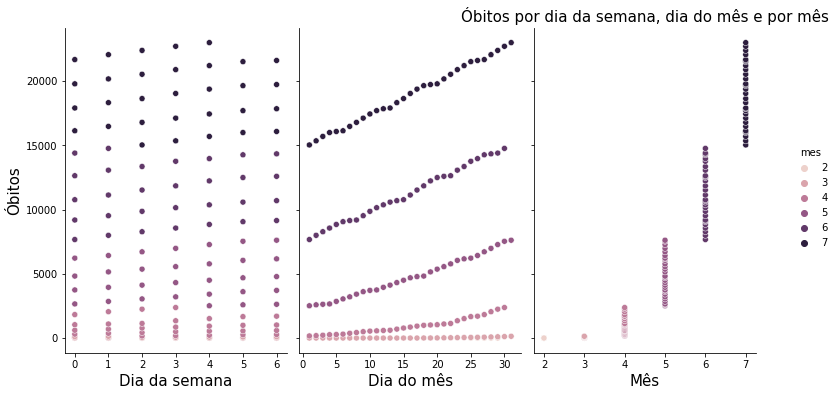

In [133]:
g = sns.pairplot(df_final.dropna(), hue ='mes', x_vars=['diasemana', 'diames', 'mes'], y_vars='Obitos')
g.fig.set_size_inches(12,6)
g.axes[0][0].set_xlabel('Dia da semana', fontsize=15)
g.axes[0][1].set_xlabel('Dia do mês', fontsize=15)
g.axes[0][2].set_xlabel('Mês', fontsize=15)
g.axes[0][0].set_ylabel('Óbitos', fontsize=15)
plt.title('Óbitos por dia da semana, dia do mês e por mês', fontsize=15)
plt.show()

In [131]:
g.axes[0][0]